Compare and contrast the performance of decision tree with logistic regression and provide a detailed analysis on the performance of each of the technique.

In [ ]:
# importing the necessary libraries 

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/data')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# reading data
train = pd.read_csv("adult.csv", header = None)
test = pd.read_csv("adult_test.csv", header = None)
# adding header
train.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
test.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [ ]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train.drop_duplicates(inplace = True)

In [ ]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
test.drop_duplicates(inplace = True)

In [ ]:
print('train dataset: ',train.shape) 
print('test dataset: ',test.shape)

train dataset:  (32537, 15)
test dataset:  (16276, 15)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16276 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16276 non-null  int64 
 1   workclass       16276 non-null  object
 2   fnlwgt          16276 non-null  int64 
 3   education       16276 non-null  object
 4   education_num   16276 non-null  int64 
 5   marital_status  16276 non-null  object
 6   occupation      16276 non-null  object
 7   relationship    16276 non-null  object
 8   race            16276 non-null  object
 9   sex             16276 non-null  object
 10  capital_gain    16276 non-null  int64 
 11  capital_loss    16276 non-null  int64 
 12  hours_per_week  16276 non-null  int64 
 13  native_country  16276 non-null  object
 14  income          16276 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB


In [ ]:
# data cleaning 

def remove_fullstop(text):
    text = text.replace('.','')
    return text

for i in train.columns:
  if train[i].dtype == 'object':
    train[i] = train[i].map(str.strip)
    train[i] = train[i].apply(remove_fullstop) 
    train[i] = train[i].map(lambda x: np.nan if x=="?" else x)

In [ ]:
for i in test.columns:
  if test[i].dtype == 'object':
    test[i] = test[i].map(str.strip)
    test[i] = test[i].apply(remove_fullstop) 
    test[i] = test[i].map(lambda x: np.nan if x=="?" else x)

In [ ]:
train.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

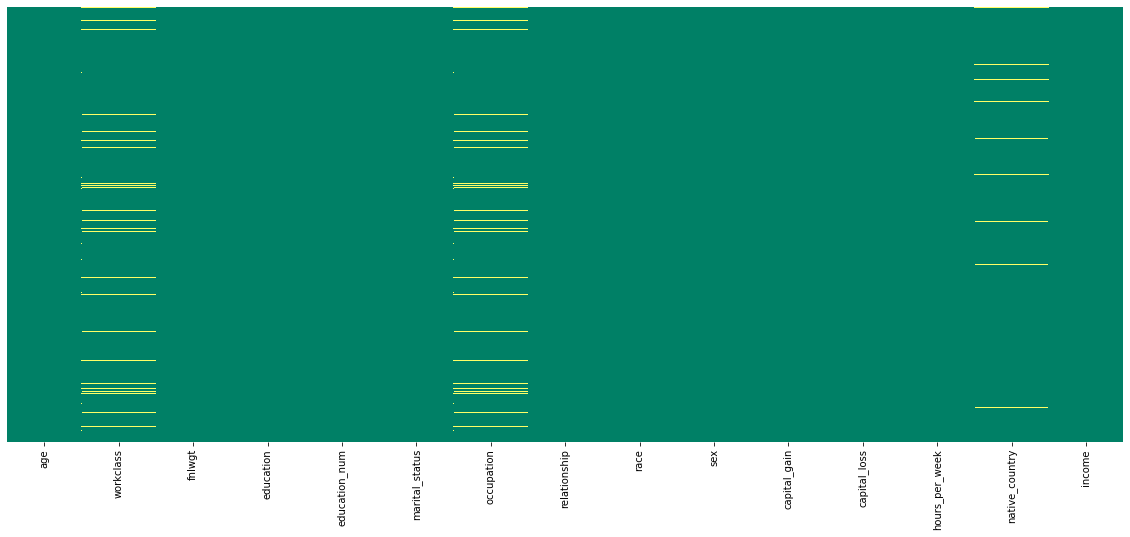

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Simple visualization of missing variables
plt.figure(figsize=(20,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'summer')

In [ ]:
print('Percentage of null values in train dataset')
print(f'workclass - {train.workclass.isna().sum()/train.shape[0]} %')
print(f'occupation - {train.occupation.isna().sum()/train.shape[0]} %')
print(f'native_country - {train.native_country.isna().sum()/train.shape[0]} %')

Percentage of null values in train dataset
workclass - 0.05642806650889756 %
occupation - 0.05664320619602299 %
native_country - 0.017887328272428313 %


In [ ]:
# removing the null values 

train = train.dropna()

In [ ]:
test.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [ ]:
print('Percentage of null values in test dataset')
print(f'workclass - {test.workclass.isna().sum()/test.shape[0]} %')
print(f'occupation - {test.occupation.isna().sum()/test.shape[0]} %')
print(f'native_country - {test.native_country.isna().sum()/test.shape[0]} %')

Percentage of null values in test dataset
workclass - 0.059166871467190955 %
occupation - 0.05935119193905136 %
native_country - 0.01683460309658393 %


In [ ]:
test = test.dropna()

In [ ]:
print('train - ', train.shape)
print('test - ', test.shape)

train -  (30139, 15)
test -  (15055, 15)


In [ ]:
# data - train + test

data = pd.concat([train,test])
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.shape

(45194, 15)

In [ ]:
data.isna().any().any()

False

In [ ]:
# creating new column (income_type) containing 2 categories (stable income and unstable income) based on the income

data['income_type'] = np.where(data['income'] == '<=50K', 'unstable income', 'stable income')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,unstable income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,unstable income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,unstable income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,unstable income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,unstable income


In [ ]:
# dropping income column
data.drop(['income'], axis = 1, inplace = True)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,unstable income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,unstable income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,unstable income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,unstable income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,unstable income


stable income % - 0.247953268132938
unstable income % - 0.752046731867062


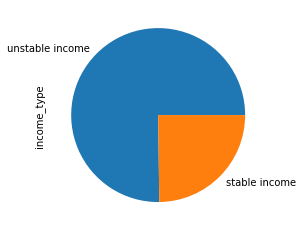

In [ ]:
# class distribution
import seaborn as sns
import matplotlib.pyplot as plt

data['income_type'].value_counts().plot(kind = 'pie')

print('stable income % -',data[data.income_type == 'stable income'].shape[0]/data.shape[0])
print('unstable income % -',data[data.income_type == 'unstable income'].shape[0]/data.shape[0])

In [ ]:
import seaborn as sns

# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


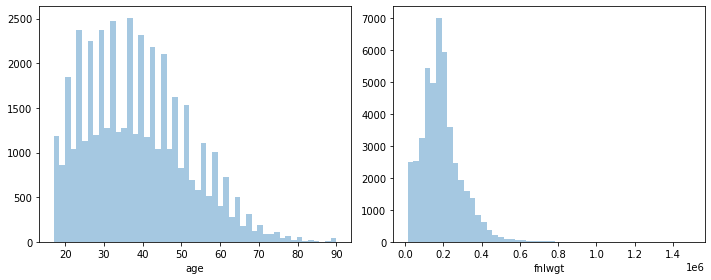

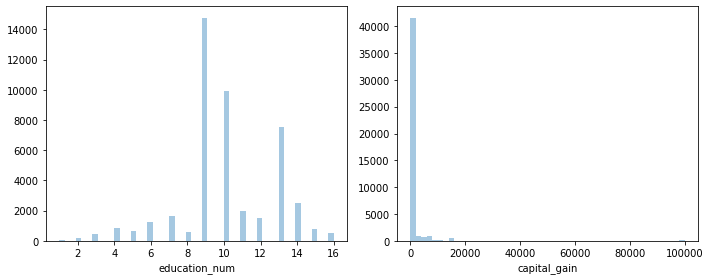

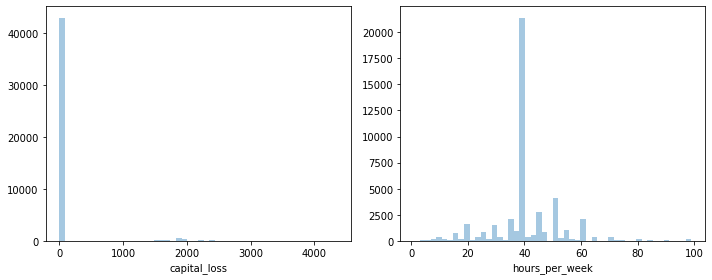

In [ ]:
plot_continuous_columns(data)

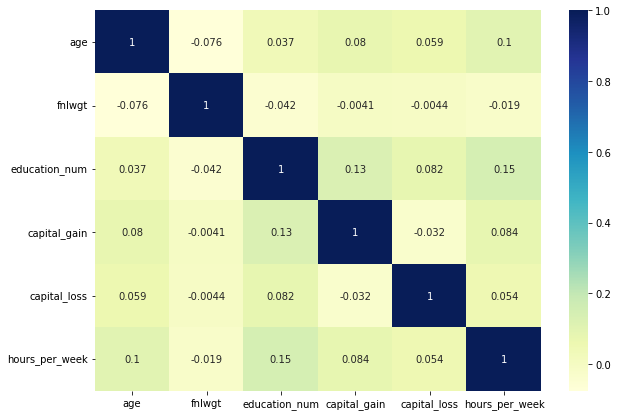

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, annot = True, cmap='YlGnBu')

In [ ]:
# unique values for categorical variables

for i in data.columns:
  if data[i].dtype == 'object':
    print(i,'-', data[i].unique(),'\n')

workclass - ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay'] 

education - ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th'] 

marital_status - ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation - ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 

relationship - ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race - ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex - ['Male' 'Female'] 

native_country - ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germ

In [ ]:
from sklearn.preprocessing import LabelEncoder

d={'stable income':1,'unstable income':0}
data['income_type']=data['income_type'].map(d).astype(int)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
data['native_country'].value_counts()

United-States                 41270
Mexico                          899
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [ ]:
data = data.loc[data['native_country'] == "United-States"]
del data['native_country']
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,0


In [ ]:
del data['capital_gain']
del data['capital_loss']
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income_type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,0


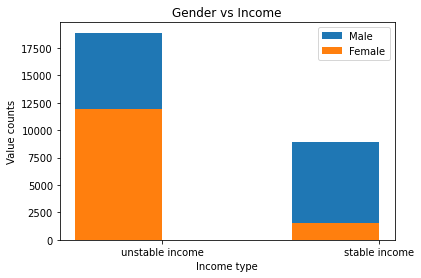

In [ ]:
ab = [data.sex[data.income_type == 0].value_counts()['Male'],data.sex[data.income_type == 1].value_counts()['Male']]
cd = [data.sex[data.income_type == 0].value_counts()['Female'],data.sex[data.income_type == 1].value_counts()['Female']]

Gr = ['unstable income','stable income']
X_axis = np.arange(len(Gr))
plt.bar(X_axis - 0.2,ab,0.4,label = 'Male')
plt.bar(X_axis - 0.2,cd,0.4,label = 'Female')
plt.xticks(X_axis,Gr)
plt.xlabel('Income type')
plt.ylabel('Value counts')
plt.title('Gender vs Income')
plt.legend()
plt.show()

Male % - 0.6738066392052339
Female % - 0.3261933607947662


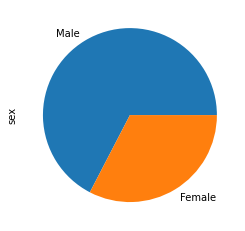

In [ ]:
data['sex'].value_counts().plot(kind = 'pie')

print('Male % -',data[data.sex == 'Male'].shape[0]/data.shape[0])
print('Female % -',data[data.sex == 'Female'].shape[0]/data.shape[0])

In [ ]:
# label encoding

# Sex: 
d={'Female':0,'Male':1}
data['sex']=data['sex'].map(d).astype(int)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income_type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,40,0


In [ ]:
data['race'].value_counts()

White                 36327
Black                  3961
Amer-Indian-Eskimo      417
Asian-Pac-Islander      397
Other                   168
Name: race, dtype: int64

In [ ]:
# Race: 0-White; 1-Black; 
d={'White':0,'Black':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':2,'Other':2}
data['race']=data['race'].map(d).astype(int)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income_type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,1,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,1,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,1,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,1,40,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,0,0,40,0


In [ ]:
data['race'].value_counts()

0    36327
1     3961
2      982
Name: race, dtype: int64

In [ ]:
del data['relationship'] # since closely related to marital status

In [ ]:
data['marital_status'].value_counts()

Married-civ-spouse       19160
Never-married            13338
Divorced                  5960
Separated                 1248
Widowed                   1171
Married-spouse-absent      362
Married-AF-spouse           31
Name: marital_status, dtype: int64

In [ ]:
# Marital status:
d = {'Married-civ-spouse': 0,'Married-AF-spouse': 0, 'Never-married':1, 'Widowed': 2,'Divorced': 2,'Separated': 2, 'Married-spouse-absent': 2 }
data['marital_status']=data['marital_status'].map(d).astype(int)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,sex,hours_per_week,income_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,0,1,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,0,1,13,0
2,38,Private,215646,HS-grad,9,2,Handlers-cleaners,0,1,40,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,1,1,40,0
5,37,Private,284582,Masters,14,0,Exec-managerial,0,0,40,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['workclass']= label_encoder.fit_transform(data['workclass'])

In [ ]:
data['occupation']= label_encoder.fit_transform(data['occupation'])

In [ ]:
del data['education'] # education_num column already present (ordinal encoding done)

In [ ]:
data.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,race,sex,hours_per_week,income_type
0,39,5,77516,13,1,0,0,1,40,0
1,50,4,83311,13,0,3,0,1,13,0
2,38,2,215646,9,2,5,0,1,40,0
3,53,2,234721,7,0,5,1,1,40,0
5,37,2,284582,14,0,3,0,0,40,0


# Model Building without SMOTE

In [ ]:
X = data.drop(['income_type'],axis=1)
y = data['income_type']

In [ ]:
X.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,race,sex,hours_per_week
0,39,5,77516,13,1,0,0,1,40
1,50,4,83311,13,0,3,0,1,13
2,38,2,215646,9,2,5,0,1,40
3,53,2,234721,7,0,5,1,1,40
5,37,2,284582,14,0,3,0,0,40


In [ ]:
X_train = X[:30139]
X_test = X[30139:]
y_train = y[:30139]
y_test = y[30139:]

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[7677  676]
 [1386 1392]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      8353
           1       0.67      0.50      0.57      2778

    accuracy                           0.81     11131
   macro avg       0.76      0.71      0.73     11131
weighted avg       0.80      0.81      0.80     11131



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = logreg.score(X_train,y_train )
print('Train Accuracy: %.2f' % (accuracy*100))

Train Accuracy: 81.31


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f' % (accuracy*100))

Test Accuracy: 81.48


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[7024 1329]
 [1248 1530]]


In [ ]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      8353
           1       0.54      0.55      0.54      2778

    accuracy                           0.77     11131
   macro avg       0.69      0.70      0.69     11131
weighted avg       0.77      0.77      0.77     11131



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = logreg.score(X_train,y_train )
print('Train Accuracy: %.2f' % (accuracy*100))

Train Accuracy: 81.31


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f' % (accuracy*100))

Test Accuracy: 76.85


# Model Building with SMOTE

In [ ]:
X = data.drop(['income_type'],axis=1)
y = data['income_type']
X.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,race,sex,hours_per_week
0,39,5,77516,13,1,0,0,1,40
1,50,4,83311,13,0,3,0,1,13
2,38,2,215646,9,2,5,0,1,40
3,53,2,234721,7,0,5,1,1,40
5,37,2,284582,14,0,3,0,0,40


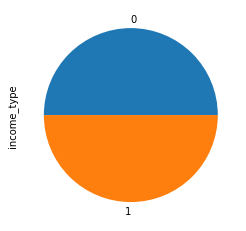

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)
y_res.value_counts().plot.pie()

In [ ]:
print("size after sampling:" ,len(y_res))
print("size before sampling:" ,len(y))

size after sampling: 61648
size before sampling: 41270


In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=0.30,random_state = 0, stratify = y_res)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = StandardScaler()
X_train1 = ss.fit_transform(X_train1)
X_test1 = ss.transform(X_test1)

## Logistic Regression

In [ ]:
logreg1 = LogisticRegression()
logreg1.fit(X_train1, y_train1)

LogisticRegression()

In [ ]:
y_pred1 = logreg1.predict(X_test1)

In [ ]:
print(confusion_matrix(y_test1,y_pred1))

[[7055 2193]
 [1219 8028]]


In [ ]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81      9248
           1       0.79      0.87      0.82      9247

    accuracy                           0.82     18495
   macro avg       0.82      0.82      0.82     18495
weighted avg       0.82      0.82      0.82     18495



In [ ]:
accuracy = logreg1.score(X_train1,y_train1 )
print('Train Accuracy: %.2f' % (accuracy*100))

Train Accuracy: 81.73


In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)
print('Test Accuracy: %.2f' % (accuracy*100))

Test Accuracy: 81.55


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train1,y_train1)
y_pred1 = dtree.predict(X_test1)
print(confusion_matrix(y_test1,y_pred1))

[[7327 1921]
 [1736 7511]]


In [ ]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      8353
           1       0.54      0.55      0.54      2778

    accuracy                           0.77     11131
   macro avg       0.69      0.70      0.69     11131
weighted avg       0.77      0.77      0.77     11131



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test1, y_pred1)
print('Test Accuracy: %.2f' % (accuracy*100))

Test Accuracy: 80.23


# Conclusion 



* For the given data logistic regression proved to be a better model (Numerical features, binary class - target variable)
* After SMOTE the accuracy of the models decreased. 
* Time taken - Decision tree is faster than logistic regresssion
* Confusion metric reveals decision tree has better performance than logistic regression.
* Decision trees can handle high dimensional data but logistic regression do not work if number of features is higher than the number of observations.
* Decision tree is prone to overfitting while logistic regression is neutral.



